In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# !pip install --user --upgrade pip
# !pip install --user -q tensorflow==2.0.0-alpha0

import tensorflow as tf

In [6]:
print("Eager Execution: {}".format(tf.executing_eagerly()))
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))

# Install a temporary patch to enable a few extra TF 2.0 upgrades. This piece will be removed soon.

from tensorflow.python.ops import control_flow_util
control_flow_util.ENABLE_CONTROL_FLOW_V2 = True

#@tf.function
var = tf.Variable([3, 3])

if tf.test.is_gpu_available(): 
    print('Running on GPU')
    print('GPU #0?')
    print(var.device.endswith('GPU:0'))
else: 
    print('Running on CPU')

Eager Execution: True
TensorFlow version: 2.0.0-alpha0
Eager execution is: True
Keras version: 2.2.4-tf
Running on CPU


# Subclassing Keras Model

In [7]:
fm = tf.keras.datasets.fashion_mnist
fm

<module 'tensorflow.python.keras.api._v2.keras.datasets.fashion_mnist' from '/home/gopher/.local/lib/python3.5/site-packages/tensorflow/python/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [8]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


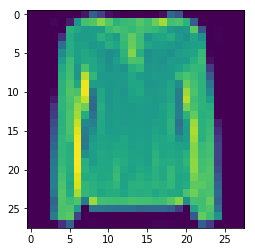

In [13]:
plt.imshow(x_train[9999])

In [28]:
x_train, x_test = x_train/255., x_test/255.

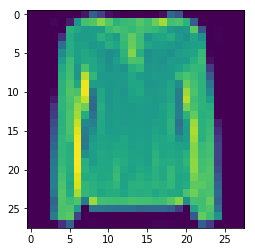

In [29]:
plt.imshow(x_train[9999])

In [31]:
epochs = 10
num_classes = 10
img_size = x_train.shape[1]   # 28

class MyModel(tf.keras.Model):
    
    def __init__(self, num_class = num_classes):
        super(MyModel, self).__init__()
        
        # Define layers below
        inputs = tf.keras.Input(shape=(img_size, img_size))   # Return a placeholder tensor
        
        self.x1 = tf.keras.layers.Flatten()
        self.x2 = tf.keras.layers.Dense(512, activation=tf.nn.relu, name='ds1')
        self.x3 = tf.keras.layers.Dropout(0.3)
        
        self.outputs = tf.keras.layers.Dense(num_class, activation=tf.nn.softmax, name='ds2')
        
    def call(self, inputs):
        
        # Define forward pass below (Functional API style)
        x = self.x1(inputs)
        x = self.x2(x)
        x = self.x3(x)
        return self.outputs(x)
        

In [32]:
model = MyModel()

In [33]:
optimizer = tf.keras.optimizers.Adam()

In [36]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
ds1 (Dense)                  multiple                  401920    
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
ds2 (Dense)                  multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train, y_train, batch_size=32, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.9353 - accuracy: 0.6911
Epoch 2/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.5887 - accuracy: 0.7883
Epoch 3/10
60000/60000 [==============================] - 17s 279us/sample - loss: 0.5216 - accuracy: 0.8134
Epoch 4/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.4860 - accuracy: 0.8269
Epoch 5/10
60000/60000 [==============================] - 18s 296us/sample - loss: 0.4605 - accuracy: 0.8351
Epoch 6/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.4406 - accuracy: 0.8422
Epoch 7/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.4275 - accuracy: 0.8473
Epoch 8/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.4152 - accuracy: 0.8513
Epoch 9/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.4050 - accuracy: 0.8545
Epoch 10/10
60000/6

In [38]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 131us/sample - loss: 0.4153 - accuracy: 0.8470


[0.41528560655117036, 0.847]